In [30]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [31]:
!pip install psycopg2-binary

In [32]:
import psycopg2 as pg

con = pg.connect("dbname=datawarehouse user=jarvis_ro password=XJk%72kV host=prod-dwh.cxmfelfcussu.ap-southeast-1.rds.amazonaws.com port=5432")
cur = con.cursor()

query = """
select
  id_order ,
  order_date ,
  (case when id_order_platform = 4 then 'offline'
  else 'in store pickup' end) platform_order,
  (case when id_order_platform = 4 then dos.store_alias 
  else dos2.store_alias  end) store_alias,
  (case when id_order_platform = 4 then dos.store_name  
  else dos2.store_name end) store_name,
  dc.id_customer ,
  dp.reference sku_ref,
  dp.product_name,
  dp.brand,
  dp.product_attribute,
  dp.category_default,
  before_discount,
  after_discount ,
  total_product_quantity - foi.refunded_quantity as qty
from
  dwh_revamp.fact_order_item foi
left join dwh_revamp.dim_customer dc on
  dc.id = foi.id_customer
left join dwh_revamp.dim_product dp on
  dp.id = foi.id_product
left join dwh_revamp.dim_offlinestore_store dos on foi.id_offlinestore_store = dos.id
left join dwh_revamp.dim_offlinestore_store dos2 on foi.fullfilment_offlinestore_id = dos2.id
where
  data_source = 'sociolla'
  and foi.sociolla_is_net = 1
  and foi.order_type != 'Egift'
  and foi.order_date::date between '2023-01-01' and '2023-12-31'
  and (id_order_platform = 4 or order_type = 'In Store Pickup')
    and (dos.store_alias = 'SAB' or dos2.store_alias = 'SAB')
  and (foi.order_product_type = 'original'::enum_sociolla_order_product_type
    or ( foi.order_product_type = 'gift-with-purchase'::enum_sociolla_order_product_type
      and dp.product_classification = 'sellable_products'))
    and foi.id_product not in (126938, 126942, 126940, 126936, 116486, 116489, 116485, 113660, 113711, 113661, 85154, 52611, 89814, 108440, 108442, 68508, 68689, 68722, 85160, 89810, 89813, 108437, 124954, 127938, 127934, 127929, 124955, 127886, 127885, 127930, 127933, 127937, 154732, 154730, 154731, 154729, 154727, 154728)
"""
cur.execute(query)


results = cur.fetchall()
# results = cur.fetchmany(10)


for row in results:
    print(row)

# Close cursor and connection
# cur.close()
# con.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('658fc52aee09dc4549d41859', datetime.date(2023, 12, 30), 'offline', 'SAB', 'Sociolla Aeon BSD', '63297a185cc93a373440f358', 'BOJ.SC-GPRCM1001', 'Green Plum Refreshing Cleanser', 'beauty of joseon', 'size : 100ml', 'face wash', 180000, 144000, 1)
('658fc1503dca792e884ab5f3', datetime.date(2023, 12, 30), 'offline', 'SAB', 'Sociolla Aeon BSD', '6517f443687812eb10ef22ca', 'SKC.SC-XCBMGG5301', '5X Ceramide Barrier Moisture Gel', 'skintific', 'size : 30 gr', 'face gel', 154200, 131070, 1)
('658fce4821f04634704b826d', datetime.date(2023, 12, 30), 'offline', 'SAB', 'Sociolla Aeon BSD', '64d5cf7084046672c30040bc', 'DZM.SC-SSHFMALL1', 'Skin Stay Hydrated! Facial Mist', 'dazzle me', 'non_specify : Non Specify', 'face mist', 29900, 29900, 1)
('658fc47f635e6146c0e2453d', datetime.date(2023, 12, 30), 'offline', 'SAB', 'Sociolla Aeon BSD', '5ce8e6f7541b260007a57622', 'CX.SC-APMPALL1', 'Acne Pimple Master Patch', 'cosrx', 'non_specify : Non Specify', 'acne / pimple patch', 59000, 50150, 1)
('657545cf

In [33]:
df = pd.DataFrame(results, columns=["id_order", "order_date", "platform_order", "store_alias", "store_name", "id_customer", "sku_ref", "product_name", "brand", "product_attribute", "category_default", "before_discount", "after_discount", "qty"])
df.tail()

id_order  order_date platform_order store_alias  \
270700  64b9237b7cc2248054db1c0b  2023-07-20        offline         SAB   
270701  64b506906c007d38c94088e4  2023-07-17        offline         SAB   
270702  64bf60787a649808b6244504  2023-07-25        offline         SAB   
270703  64bbb29fa747caab91f1f4f4  2023-07-22        offline         SAB   
270704  64b7dd40e1ec87d957206fb6  2023-07-19        offline         SAB   

               store_name               id_customer                  sku_ref  \
270700  Sociolla Aeon BSD  5c1ac65b3b351a332003eb97  KILL-SIN.SC-MCHCBTM2101   
270701  Sociolla Aeon BSD  620b6a71b2ee0660fa49769d  KILL-SIN.SC-MCHCBTM2101   
270702  Sociolla Aeon BSD  64bf60339e1e1dbd724446e5  KILL-SIN.SC-MCHCBTM2101   
270703  Sociolla Aeon BSD  5d078d211bef7800080b263c  KILL-SIN.SC-MCHCBTM2101   
270704  Sociolla Aeon BSD  64858f5b22313d7a8a008be2  KILL-SIN.SC-MCHCBTM2101   

                                             product_name     brand  \
270700  SKIN1004 Madagascar Centella Hyalu-Cica Bright...  skin1004   
270701  SKIN1004 Madagascar Centella Hyalu-Cica Bright...  skin1004   
270702  SKIN1004 Madagascar Centella Hyalu-Cica Bright...  skin1004   
270703  SKIN1004 Madagascar Centella Hyalu-Cica Bright...  skin1004   
270704  SKIN1004 Madagascar Centella Hyalu-Cica Bright...  skin1004   

       product_attribute category_default  before_discount  after_discount  \
270700     size : 210 ml            toner           646000          174420   
270701     size : 210 ml            toner          1292000          348840   
270702     size : 210 ml            toner           646000          161500   
270703     size : 210 ml            toner           646000          174420   
270704     size : 210 ml            toner           646000          174420   

        qty  
270700    1  
270701    2  
270702    1  
270703    1  
270704    1

In [34]:
sorted_df = df.sort_values(by="qty", ascending=False)
sorted_df.head()

id_order  order_date   platform_order store_alias  \
167742  64509b127a8ad43d37bca9eb  2023-05-02          offline         SAB   
103963  63ecce3d52d8bf2b2c0629fd  2023-02-15          offline         SAB   
1781    6458d2413724c92002b1cfbf  2023-05-08          offline         SAB   
185672  656eee8d5fb3614cea647f80  2023-12-05  in store pickup         SAB   
158745  64089cbc8ac7794d67733bdb  2023-03-08          offline         SAB   

               store_name               id_customer            sku_ref  \
167742  Sociolla Aeon BSD  5c1aaa913b351a3320ad357a     CX.SC-LGMC1501   
103963  Sociolla Aeon BSD  5f46888fb0f63212583fddaa   MH.SC-AFSMGTALL1   
1781    Sociolla Aeon BSD  5c1aaa913b351a3320ad357a      AU.SC-SPCF501   
185672  Sociolla Aeon BSD  5de914b4af355e5a461f5cce    MOP.MU-MTLPG851   
158745  Sociolla Aeon BSD  5c1aaa913b351a3320ad357a  CX.SC-RBFYGTTALL1   

                                  product_name            brand  \
167742            Low pH Good Morning Cleanser            cosrx   
103963           Airy Fit Sheet Mask Green Tea           missha   
1781              Smooth & Pure Cleansing Foam            ariul   
185672      Microblur Translucent Loose Powder  mother of pearl   
158745  RX BRIGHTENING - FIND YOUR GO-TO TONER            cosrx   

       product_attribute category_default  before_discount  after_discount  \
167742     size : 150 ml    cleansing gel          8835000         1767000   
103963   variant : Sheet       sheet mask          1725000          690000   
1781        size : 50 ml        face wash          1354500          135450   
185672      size : 8,5gr     loose powder          6042000         6042000   
158745      size : 1 Kit            toner          9652000         2895600   

        qty  
167742   57  
103963   50  
1781     43  
185672   38  
158745   38

In [35]:
# key ada di order

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# drop everything aside from id_order as key and category_default as attribute -- unsure about qty
df_cluster = df.drop(columns=["order_date", "platform_order", "store_alias", "store_name", "id_customer", "sku_ref", "product_name", "brand", "product_attribute", "before_discount", "after_discount","qty"])

one_hot_encoded = pd.get_dummies(df_cluster['category_default'], prefix='category')
df_cluster_encoded = pd.concat([df_cluster, one_hot_encoded], axis=1)
df_cluster_encoded.drop(columns=['category_default'], inplace=True)

df_cluster_encoded.head(20)

id_order  category_2in1 body wash/head-to-toe wash  \
0   6443afb669342638a80d224e                                     False   
1   644a5f08083350eb2170bbeb                                     False   
2   644cada54a059815055e345c                                     False   
3   644a66aba76721865fe3baac                                     False   
4   644cc64488e33314e3fb5528                                     False   
5   64564470dcc392ea2f091346                                     False   
6   644244c38ac77e4dce3e4247                                     False   
7   64564402ac30f30b220fe94b                                     False   
8   643fa8f57fea5784d3009ffb                                     False   
9   6443dbef12153027a162ba59                                     False   
10  6448b961d28071800fe9f8df                                     False   
11  645642acaef718c136192c12                                     False   
12  64421da5e49de70ca2d26fcc                                     False   
13  64410c74b038920ade7ce33a                                     False   
14  643fc0e7171cd1f4fd981ef1                                     False   
15  645642acaef718c136192c12                                     False   
16  643fb21f02b3db9e3d691948                                     False   
17  644a6e2e9f1c1d477a156a20                                     False   
18  6458ecf66dcfdf00c660c472                                     False   
19  6448a0db474c18b49ecc1705                                     False   

    category_acne / pimple patch  \
0                          False   
1                          False   
2                          False   
3                          False   
4                          False   
5                          False   
6                          False   
7                          False   
8                          False   
9                          False   
10                         False   
11                         False   
12                         False   
13                         False   
14                         False   
15                         False   
16                         False   
17                         False   
18                         False   
19                         False   

    category_acne treatment / sealing gel / cream  category_after sun care  \
0                                           False                    False   
1                                           False                    False   
2                                           False                    False   
3                                           False                    False   
4                                           False                    False   
5                                           False                    False   
6                                           False                    False   
7                                           False                    False   
8                                           False                    False   
9                                           False                    False   
10                                          False                    False   
11                                          False                    False   
12                                          False                    False   
13                                          False                    False   
14                                          False                    False   
15                                          False                    False   
16                                          False                    False   
17                                          False                    False   
18                                          False                    False   
19                                          False                    False   

    category_ampoule  category_baby finger foods  category_baby wipes

In [36]:
X = df_cluster_encoded.drop(columns=['id_order'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k = 5  # Number of neighbors
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


clusters = kmeans.labels_
df_cluster_encoded['cluster'] = clusters

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
# print(df_cluster_encoded[['id_order', 'cluster']].head(10))
print(df_cluster_encoded.head(30))

                    id_order  category_2in1 body wash/head-to-toe wash  \
0   6443afb669342638a80d224e                                     False   
1   644a5f08083350eb2170bbeb                                     False   
2   644cada54a059815055e345c                                     False   
3   644a66aba76721865fe3baac                                     False   
4   644cc64488e33314e3fb5528                                     False   
5   64564470dcc392ea2f091346                                     False   
6   644244c38ac77e4dce3e4247                                     False   
7   64564402ac30f30b220fe94b                                     False   
8   643fa8f57fea5784d3009ffb                                     False   
9   6443dbef12153027a162ba59                                     False   
10  6448b961d28071800fe9f8df                                     False   
11  645642acaef718c136192c12                                     False   
12  64421da5e49de70ca2d26fcc          

In [9]:
#df_cluster_encoded.to_csv('cluster_encoded_full.csv', index=False)

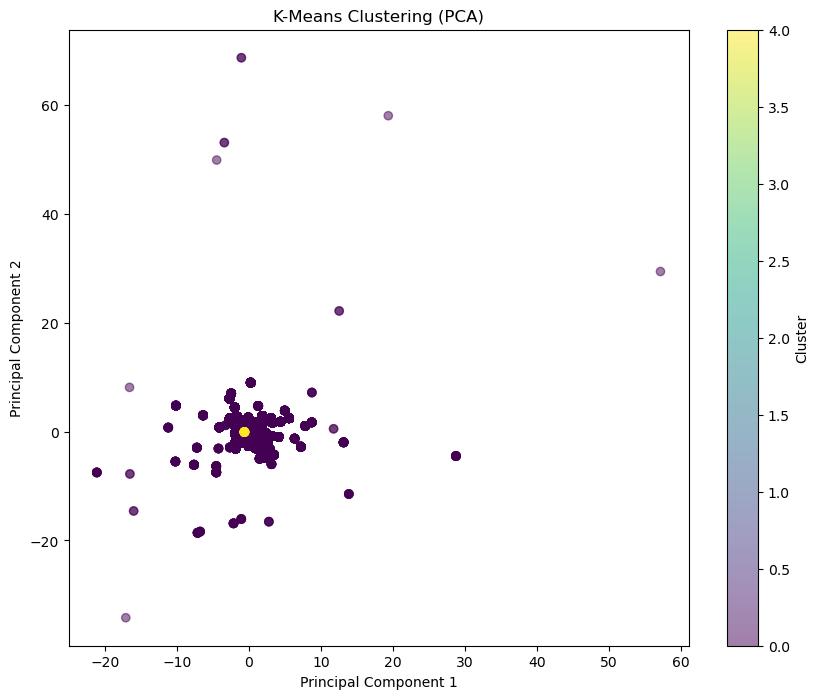

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality using PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids = kmeans.cluster_centers_



# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# plt.figure(figsize=(10, 8))
# for i, centroid in enumerate(centroids):
#     cluster_points = X_pca[clusters == i]
#     plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=f'C{i}', alpha=0.5, label=f'Cluster {i}')    
#     plt.scatter(centroid[0], centroid[1], marker='X', s=200, color='red')
#     for point in cluster_points:
#         plt.plot([centroid[0], point[0]], [centroid[1], point[1]], c=f'C{i}', alpha=0.3)



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA)')
plt.colorbar(label='Cluster')
plt.show()

## Trying association rule mining algorithm: FP-Growth & Apriori

In [39]:
df_for_arm = df.drop(columns=["order_date", "platform_order", "store_alias", "store_name", "id_customer", "sku_ref", "product_name", "brand", "product_attribute", "before_discount", "after_discount"])

df_for_arm.tail()

id_order category_default  qty
270700  64b9237b7cc2248054db1c0b            toner    1
270701  64b506906c007d38c94088e4            toner    2
270702  64bf60787a649808b6244504            toner    1
270703  64bbb29fa747caab91f1f4f4            toner    1
270704  64b7dd40e1ec87d957206fb6            toner    1

In [ ]:
def expand_rows(row):
    if row['qty'] > 1:
        return pd.DataFrame([row] * row['qty'], index=range(row['qty']))
    else:
        return pd.DataFrame([row])
    
expanded_df = pd.concat(df_for_arm.apply(expand_rows, axis=1).values)
expanded_df.reset_index(drop=True, inplace=True)
expanded_df.head(10)

In [ ]:
!pip install mlxtend

In [ ]:
#fpgrowth

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

fpgrowth_df = expanded_df.drop(columns=['qty'])
fpgrowth_df.dropna(inplace=True)


transaction_list = fpgrowth_df.groupby('id_order')['category_default'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_binary = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_binary, min_support=0.01, use_colnames=True)
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# print(frequent_itemsets)

print(frequent_itemsets_sorted)


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_apriori = apriori(df_binary, min_support=0.01, use_colnames=True)
print(frequent_itemsets_apriori)


In [22]:
frequent_itemsets_apriori_sorted = frequent_itemsets_apriori.sort_values(by='support', ascending=False)
print(frequent_itemsets__apriori_sorted)

     support                    itemsets
46  0.159444                 (sunscreen)
44  0.150293                (sheet mask)
35  0.127029                  (lip tint)
29  0.120279                (face serum)
5   0.097365  (body lotion / body serum)
..       ...                         ...
13  0.010688               (conditioner)
17  0.010263             (eau de parfum)
64  0.010209      (lip tint, face serum)
54  0.010081        (sunscreen, cushion)
3   0.010014            (blotting paper)

[78 rows x 2 columns]


In [23]:
#download results to csv
#please change the name according to store

file_path = 'ssm_association_results.xlsx'

with pd.ExcelWriter(file_path) as writer:
    frequent_itemsets.to_excel(writer, sheet_name='fpgrowth', index=False)
    frequent_itemsets_apriori.to_excel(writer, sheet_name='apriori', index=False)

###Visualization

In [24]:
!pip install networkx

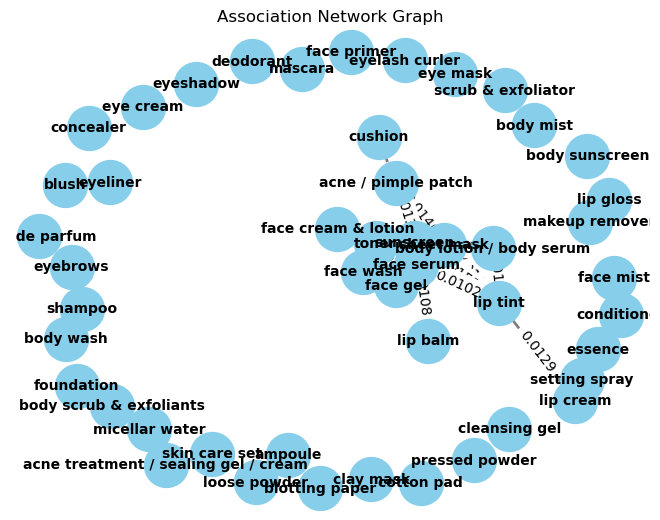

In [25]:
import networkx as nx

G = nx.Graph()

for idx, row in frequent_itemsets.iterrows():
    for item in row['itemsets']:
        G.add_node(item)


for idx, row in frequent_itemsets.iterrows():
    items = list(row['itemsets'])  # Convert frozenset to list
    if len(items) > 1:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                G.add_edge(items[i], items[j], weight=row['support'])



pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2)


edge_labels = {(u, v): round(d['weight'], 4) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title('Association Network Graph')
plt.show()

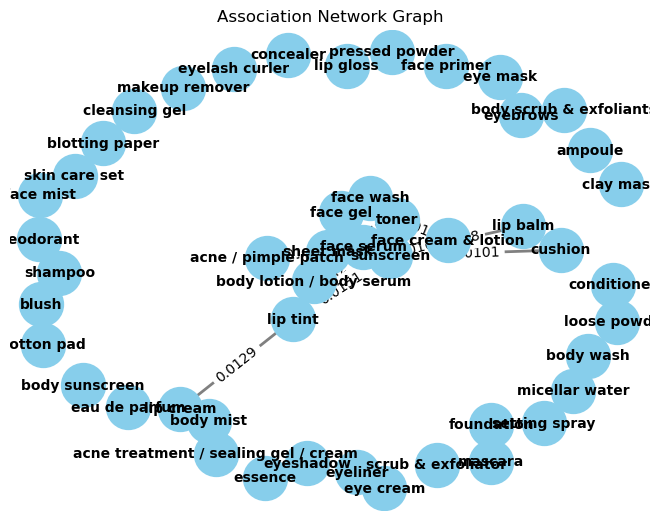

In [26]:
#apriori
import networkx as nx

G = nx.Graph()

for idx, row in frequent_itemsets_apriori.iterrows():
    for item in row['itemsets']:
        G.add_node(item)


for idx, row in frequent_itemsets_apriori.iterrows():
    items = list(row['itemsets'])  # Convert frozenset to list
    if len(items) > 1:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                G.add_edge(items[i], items[j], weight=row['support'])



pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2)


edge_labels = {(u, v): round(d['weight'], 4) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title('Association Network Graph')
plt.show()

In [ ]:
## stop here

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_20600\1804718210.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.011172720632180092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  itemsets_matrix.loc[items[i], items[j]] = row['support']
C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_20600\1804718210.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.011172720632180092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  itemsets_matrix.loc[items[j], items[i]] = row['support']
C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_20600\1804718210.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.011064811740487417' has dtype incompatible with int64, please explicitly cast to

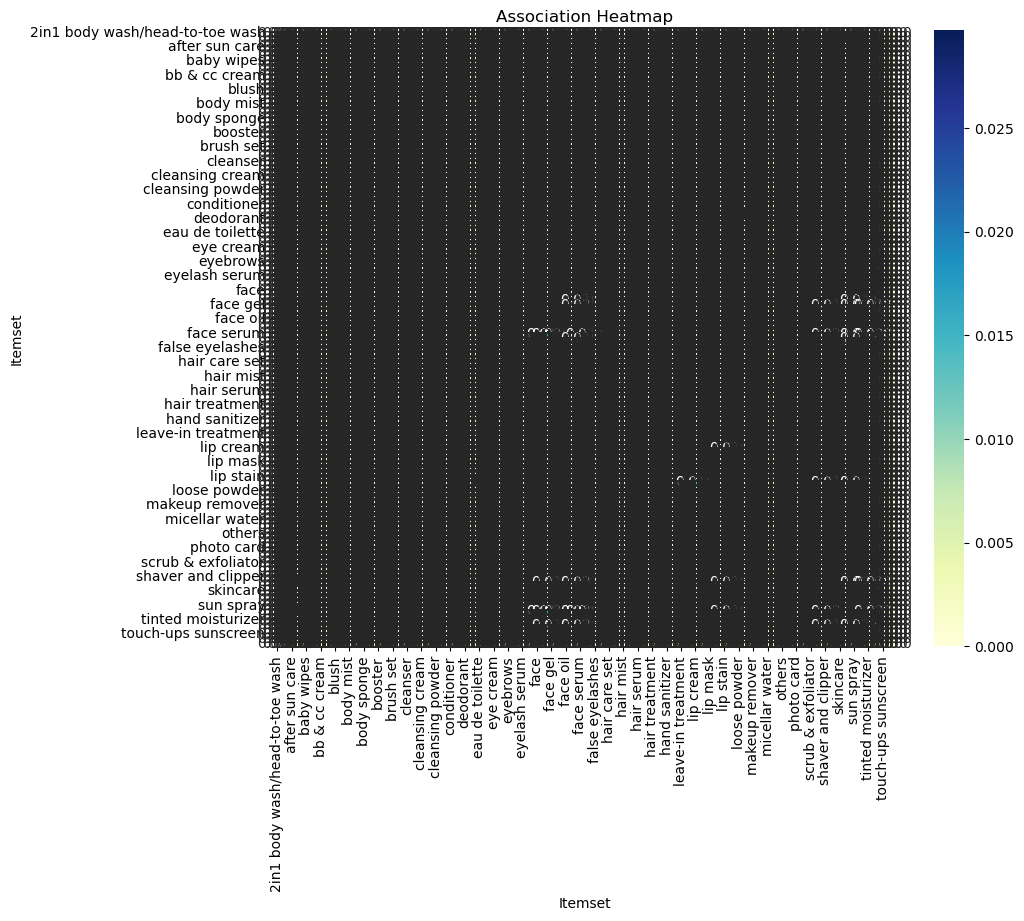

In [96]:
import seaborn as sns

itemsets_matrix = pd.DataFrame(index=te.columns_, columns=te.columns_)
itemsets_matrix.fillna(0, inplace=True)


for idx, row in frequent_itemsets_apriori.iterrows():
    items = list(row['itemsets'])
    if len(items) > 1:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                itemsets_matrix.loc[items[i], items[j]] = row['support']
                itemsets_matrix.loc[items[j], items[i]] = row['support']


plt.figure(figsize=(10, 8))
sns.heatmap(itemsets_matrix, cmap="YlGnBu", annot=True, fmt=".3f")
plt.title('Association Heatmap')
plt.xlabel('Itemset')
plt.ylabel('Itemset')
plt.show()

In [61]:
# T-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality using t-SNE to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering (t-SNE)')
plt.colorbar(label='Cluster')
plt.show()

KeyboardInterrupt: 

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

2. Initial Clustering on Variable Categories

Drop the store_name column to extract only the features in the dataset.

In [42]:
df_group1_features = df_group1.drop(columns=['store_name'])
df_group2_features = df_group2.drop(columns=['store_name'])
df_group3_features = df_group3.drop(columns=['store_name'])
df_group4_features = df_group4.drop(columns=['store_name'])
df_group5_features = df_group5.drop(columns=['store_name'])


In [43]:
#test content
df_group4_features.head()

store_size  sales_per_sqm  store_life            area_category  city_type
0         425   5.373547e+06          12           a. Jabodetabek       Kota
1         377   6.760138e+06          12  b. Java exc Jabodetabek       Kota
2         317   6.977097e+06          12           a. Jabodetabek  Kabupaten
3         307   5.175276e+06          12           a. Jabodetabek       Kota
4         272   9.661400e+06          12          c. Outside Java       Kota

Categorical columns only exist in group 4 (area_category, city_type). Hence, we do encoding to scale those values to 0 - 1. For the rest of the numeric columns, we use a scaler function to normalize the values.

3. Standardization/Normalization Data Pre-Processing - because K-means is VERY sensitive to the scale of features

In [44]:
# scaling for all groups with numerical features only
scaler = StandardScaler()
df_group1_features_scaled = scaler.fit_transform(df_group1_features)
df_group2_features_scaled = scaler.fit_transform(df_group2_features) # not sure if aov needs scaling but let's try both
df_group3_features_scaled = scaler.fit_transform(df_group3_features)
df_group5_features_scaled = scaler.fit_transform(df_group5_features)


In [45]:
# change this part to test
original_dataset = df_group3_features
check_dataset = df_group3_features_scaled

check_dataset = pd.DataFrame(check_dataset, columns=original_dataset.columns)
check_dataset.head()

cat_skincare  cat_makeup  cat_bath_and_body  cat_haircare  cat_accessories  \
0      0.672182   -0.883233          -1.090151      1.183681         1.342557   
1      0.389101   -0.996746           0.036216      2.300342         1.662814   
2     -0.422588    0.099458          -0.273225      0.766615         0.641996   
3     -0.988748    0.281078          -0.087560      0.833883         1.923023   
4      0.753062   -1.243229           0.679854      0.726253         0.902205   

   cat_fragrance  brand_mass  brand_premium_mass  brand_premium  brand_luxe  
0      -0.068125   -0.432970           -1.465869       1.522720    3.382039  
1      -0.408877   -0.107125           -1.228935       1.148001    1.761799  
2      -0.200253   -0.123216           -0.775972       0.803941    0.764729  
3       0.064004   -1.136957           -0.964126       1.662387    2.925048  
4      -0.339336    0.500315           -0.173184      -0.299775    0.557005

In [46]:
# scaling and encoding for df_group4_features which has both numerical and categorical columns

# Define the column names
categorical_columns = ['area_category', 'city_type']
numerical_columns = ['store_size', 'sales_per_sqm', 'store_life']

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
df_group4_features_scaled = preprocessor.fit_transform(df_group4_features)

# Get the column names after transformation
numerical_columns_list = numerical_columns
categorical_columns_list = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine numerical and categorical column names
columns = numerical_columns_list + list(categorical_columns_list)

# Create a DataFrame with the scaled features
df_group4_features_scaled = pd.DataFrame(df_group4_features_scaled, columns=columns)

# Print the first few rows of the transformed 
print(df_group4_features_scaled.head())

   store_size  sales_per_sqm  store_life  area_category_a. Jabodetabek  \
0    3.394702      -0.880069    0.378968                           1.0   
1    2.767004      -0.511270    0.378968                           0.0   
2    1.982382      -0.453565    0.378968                           1.0   
3    1.851612      -0.932804    0.378968                           1.0   
4    1.393915       0.260393    0.378968                           0.0   

   area_category_b. Java exc Jabodetabek  area_category_c. Outside Java  \
0                                    0.0                            0.0   
1                                    1.0                            0.0   
2                                    0.0                            0.0   
3                                    0.0                            0.0   
4                                    0.0                            1.0   

   city_type_Kabupaten  city_type_Kota  
0                  0.0             1.0  
1                  0.0

In [32]:
# convert result back to dataframe to test

columns = list(numerical_columns) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
# columns = list(numerical_columns) + list(categorical_columns)
df_group4_features_scaled_check = pd.DataFrame(df_group4_features_scaled, columns=columns)
print(df_group4_features_scaled_check.head())

   store_size  sales_per_sqm  store_life  area_category_a. Jabodetabek  \
0    3.394702      -0.880069    0.378968                           1.0   
1    2.767004      -0.511270    0.378968                           0.0   
2    1.982382      -0.453565    0.378968                           1.0   
3    1.851612      -0.932804    0.378968                           1.0   
4    1.393915       0.260393    0.378968                           0.0   

   area_category_b. Java exc Jabodetabek  area_category_c. Outside Java  \
0                                    0.0                            0.0   
1                                    1.0                            0.0   
2                                    0.0                            0.0   
3                                    0.0                            0.0   
4                                    0.0                            1.0   

   city_type_Kabupaten  city_type_Kota  
0                  0.0             1.0  
1                  0.0

In [47]:
# Print the number of columns and rows
num_rows, num_columns = df_group4_features_scaled_check.shape
print(f"Number of columns: {num_columns}")
print(f"Number of rows: {num_rows}")

# Print the DataFrame to check the first few rows
print(df_group4_features_scaled_check.head())

columns_list = df_group4_features_scaled_check.columns.tolist()
print("Column names:")
print(columns_list)


Number of columns: 8
Number of rows: 54
   store_size  sales_per_sqm  store_life  area_category_a. Jabodetabek  \
0    3.394702      -0.880069    0.378968                           1.0   
1    2.767004      -0.511270    0.378968                           0.0   
2    1.982382      -0.453565    0.378968                           1.0   
3    1.851612      -0.932804    0.378968                           1.0   
4    1.393915       0.260393    0.378968                           0.0   

   area_category_b. Java exc Jabodetabek  area_category_c. Outside Java  \
0                                    0.0                            0.0   
1                                    1.0                            0.0   
2                                    0.0                            0.0   
3                                    0.0                            0.0   
4                                    0.0                            1.0   

   city_type_Kabupaten  city_type_Kota  
0                  0.0 

4. Running k-means algorithm with k=5 or k=6 on each of the mini clusters using loop function

In [49]:
num_clusters = 5 # or 6

#-----------
# GROUP 1
#-----------

# convert from numPy to dataframe to append new column
if not isinstance(df_group1_features_scaled, pd.DataFrame):
    df_group1_features_scaled = pd.DataFrame(df_group1_features_scaled)
    
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_group1_features_scaled)

df_group1_clustered = df_group1_features_scaled.copy()
df_group1_clustered['Cluster'] = clusters


#-----------
# GROUP 2
#-----------

# convert from numPy to dataframe to append new column
if not isinstance(df_group2_features_scaled, pd.DataFrame):
    df_group2_features_scaled = pd.DataFrame(df_group2_features_scaled)
    
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_group2_features_scaled)

df_group2_clustered = df_group2_features_scaled.copy()
df_group2_clustered['Cluster'] = clusters

#-----------
# GROUP 3
#-----------

# convert from numPy to dataframe to append new column
if not isinstance(df_group3_features_scaled, pd.DataFrame):
    df_group3_features_scaled = pd.DataFrame(df_group3_features_scaled)
    
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_group3_features_scaled)

df_group3_clustered = df_group3_features_scaled.copy()
df_group3_clustered['Cluster'] = clusters


#-----------
# GROUP 4
#-----------

# convert from numPy to dataframe to append new column
if not isinstance(df_group4_features_scaled, pd.DataFrame):
    df_group4_features_scaled = pd.DataFrame(df_group4_features_scaled)
    
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_group4_features_scaled)

df_group4_clustered = df_group4_features_scaled.copy()
df_group4_clustered['Cluster'] = clusters

#-----------
# GROUP 5
#-----------

# convert from numPy to dataframe to append new column
if not isinstance(df_group5_features_scaled, pd.DataFrame):
    df_group5_features_scaled = pd.DataFrame(df_group5_features_scaled)
    
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_group5_features_scaled)

df_group5_clustered = df_group5_features_scaled.copy()
df_group5_clustered['Cluster'] = clusters


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436

5. PCA centroid plotting to show the distribution of the datapoints for each mini-cluster 

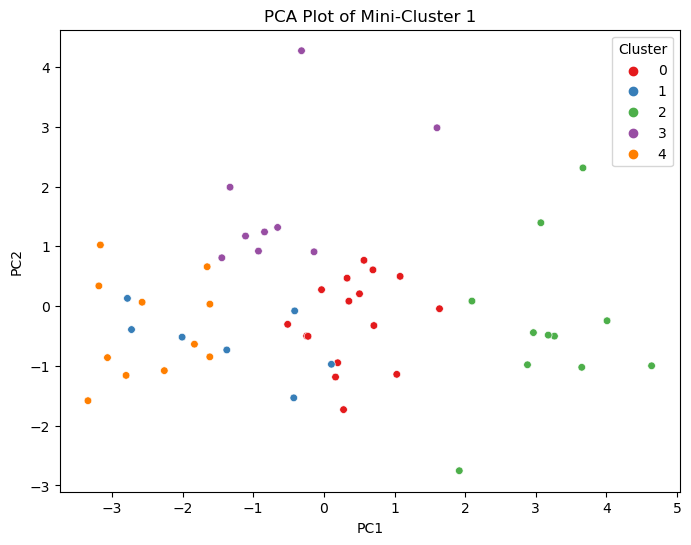

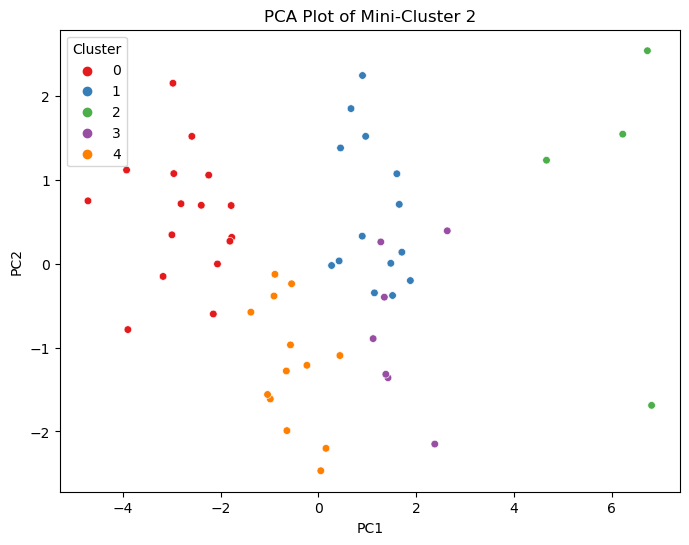

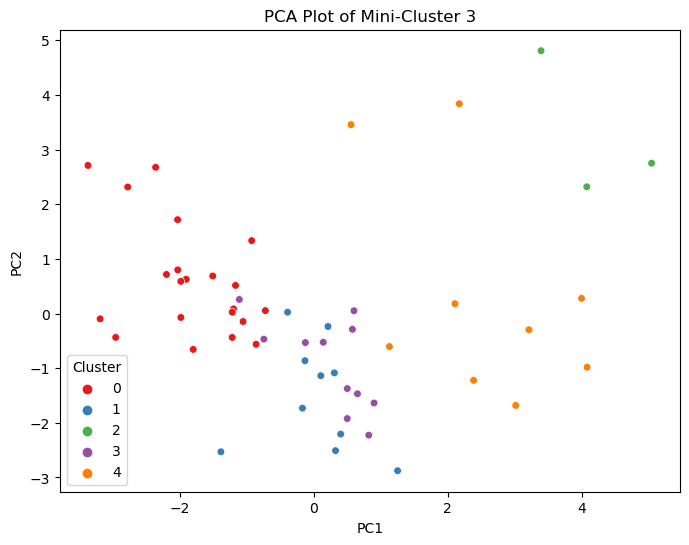

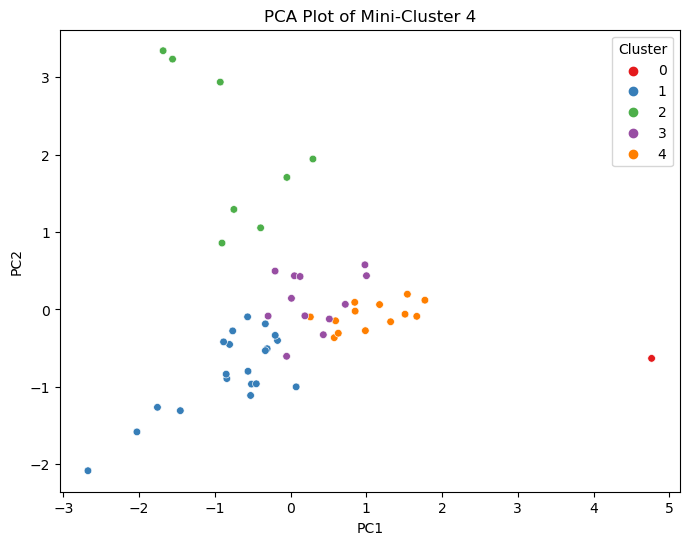

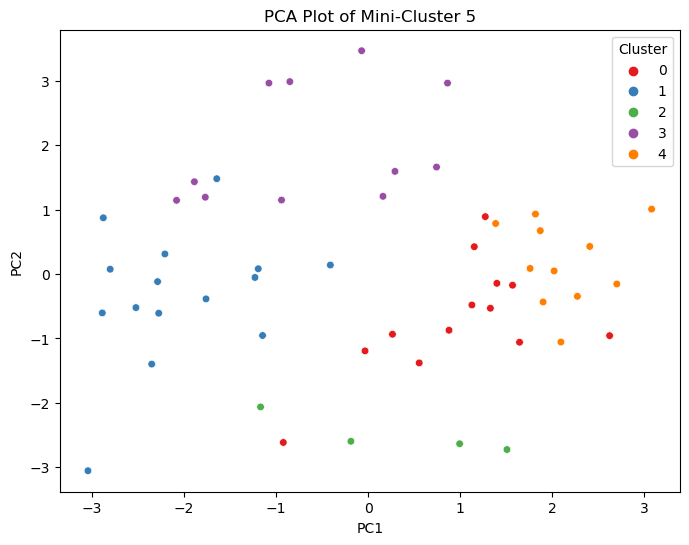

In [50]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# List of mini-cluster dataframes
mini_clusters = [df_group1_clustered, df_group2_clustered, df_group3_clustered, df_group4_clustered, df_group5_clustered]

# Define a custom color palette for clusters
custom_palette = sns.color_palette("Set1", n_colors=len(mini_clusters))

# Apply PCA and plot for each mini-cluster
for i, mini_cluster in enumerate(mini_clusters, 1):
    # Extract the feature columns (excluding 'Cluster' column)
    feature_columns = mini_cluster.columns.difference(['Cluster'])

    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(mini_cluster[feature_columns])

    # Create a new dataframe with PCA results
    df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    df_pca['Cluster'] = mini_cluster['Cluster']

    # Plot the PCA results for each mini-cluster with custom size and color palette
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30)
    plt.title(f'PCA Plot of Mini-Cluster {i}')
    plt.show()

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2852\1819321214.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points


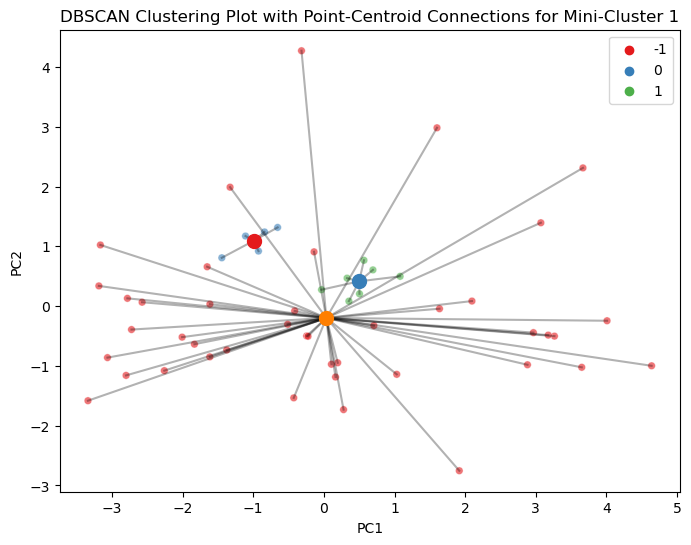

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2852\1819321214.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points


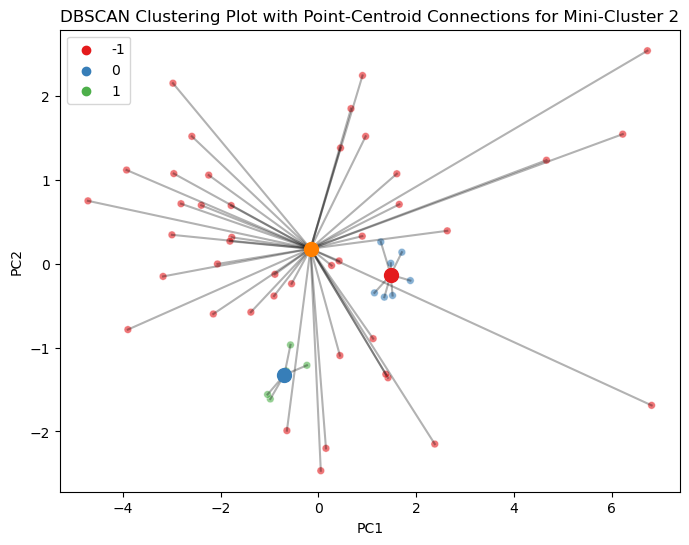

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2852\1819321214.py:38: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points


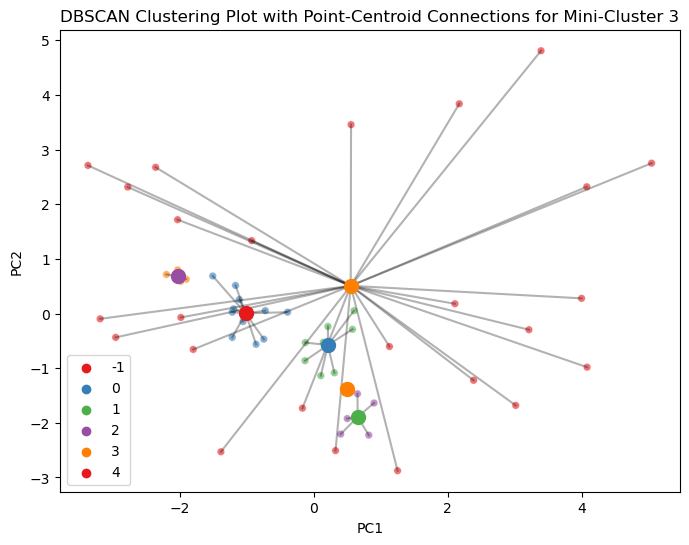

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2852\1819321214.py:38: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points


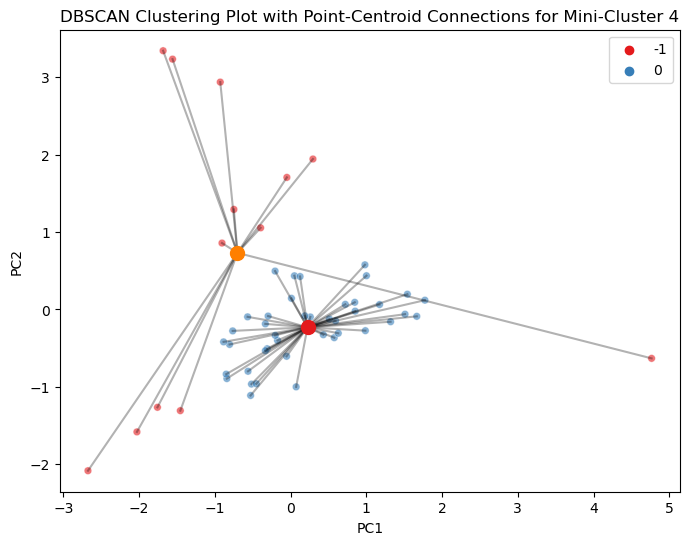

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2852\1819321214.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points


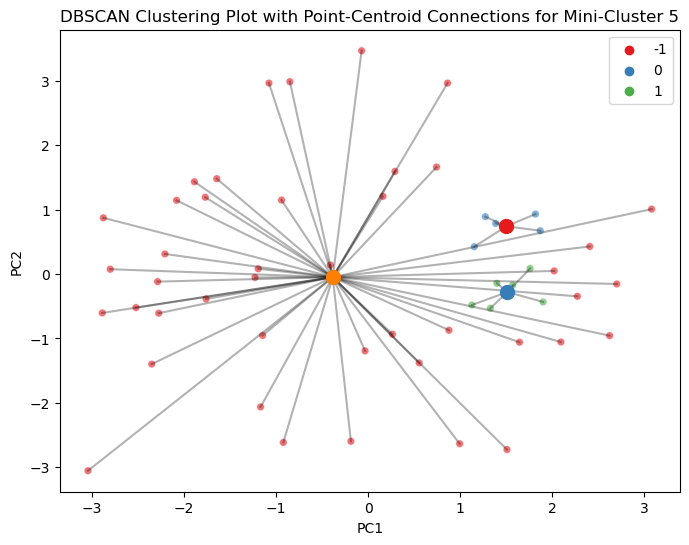

In [38]:
# from sklearn.cluster import DBSCAN
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# # List of mini-cluster dataframes
# mini_clusters = [df_group1_clustered, df_group2_clustered, df_group3_clustered, df_group4_clustered, df_group5_clustered]
# # Define a custom color palette for clusters using 'Set1'
# custom_palette = sns.color_palette("Set1", n_colors=len(mini_clusters))

# # Apply DBSCAN and plot for each mini-cluster
# for i, mini_cluster in enumerate(mini_clusters, 1):
#     # Extract the feature columns (excluding 'Cluster' column)
#     feature_columns = mini_cluster.columns.difference(['Cluster'])

#     # Apply PCA
#     pca = PCA(n_components=2)
#     pca_result = pca.fit_transform(mini_cluster[feature_columns])

#     # Apply DBSCAN
#     dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples
#     labels = dbscan.fit_predict(pca_result)

#     # Create a new dataframe with PCA results and cluster labels
#     df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
#     df_pca['Cluster'] = labels

#     # Calculate centroids
#     centroids = df_pca.groupby('Cluster').mean()

#     # Plot the DBSCAN clustering results for each mini-cluster with custom size and color palette
#     plt.figure(figsize=(8, 6))
#     for cluster, centroid in centroids.iterrows():
#         points_in_cluster = df_pca[df_pca['Cluster'] == cluster][['PC1', 'PC2']].values
#         for point in points_in_cluster:
#             plt.plot([point[0], centroid['PC1']], [point[1], centroid['PC2']], 'k-', alpha=0.3)  # Lines from points to centroid
#         plt.plot(centroid['PC1'], centroid['PC2'], 'o', color=custom_palette[cluster], markersize=10)  # Plot centroid
#     sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30, alpha=0.6)  # Plot points
#     plt.title(f'DBSCAN Clustering Plot with Point-Centroid Connections for Mini-Cluster {i}')
#     plt.legend()
#     plt.show()

    

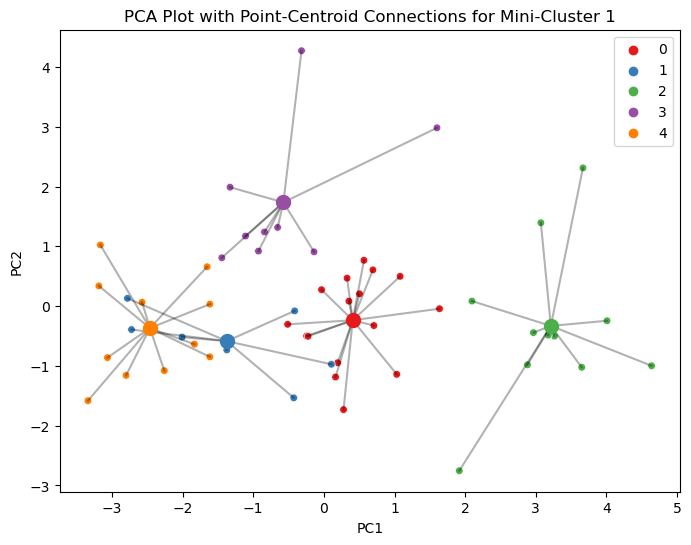

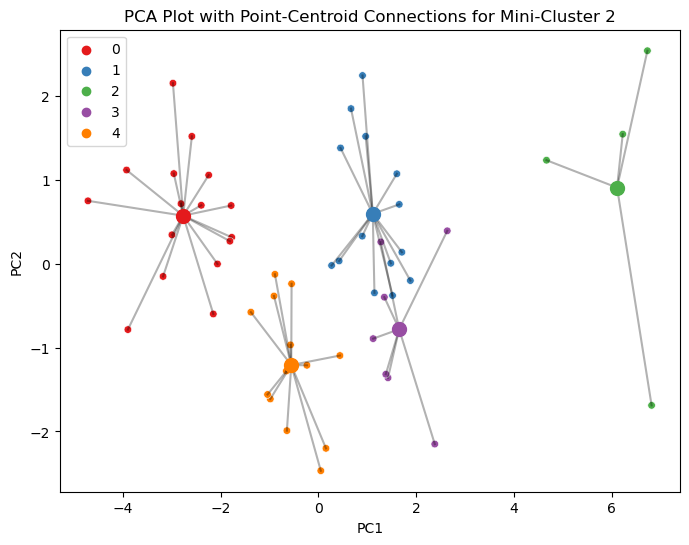

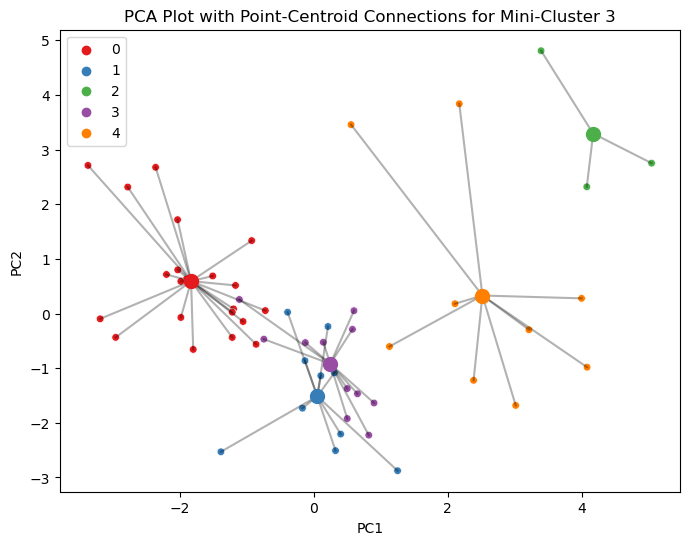

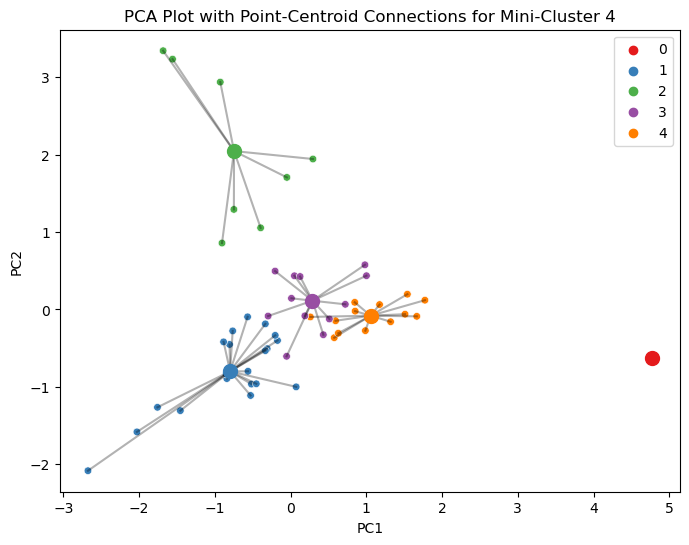

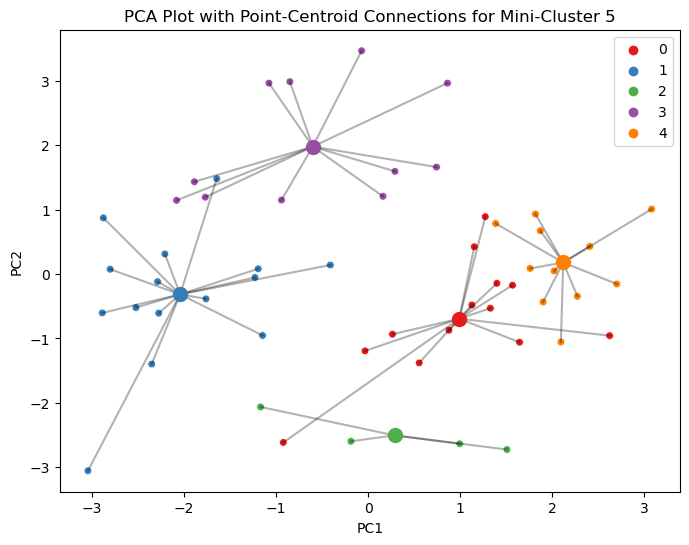

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of mini-cluster dataframes
mini_clusters = [df_group1_clustered, df_group2_clustered, df_group3_clustered, df_group4_clustered, df_group5_clustered]
# Create a list to store PCA models for each mini-cluster
MiniCluster_PCAs = []
# Define a custom color palette for clusters using 'Set1'
custom_palette = sns.color_palette("Set1", n_colors=len(mini_clusters))

# Apply PCA and plot for each mini-cluster
for i, mini_cluster in enumerate(mini_clusters, 1):
    # Extract the feature columns (excluding 'Cluster' column)
    feature_columns = mini_cluster.columns.difference(['Cluster'])

    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(mini_cluster[feature_columns])
    # Store PCA model in the list
    MiniCluster_PCAs.append(pca)

    # Create a new dataframe with PCA results
    df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    df_pca['Cluster'] = mini_cluster['Cluster']

    # Calculate centroids
    centroids = df_pca.groupby('Cluster').mean()

    # Plot the PCA results for each mini-cluster with custom size and color palette
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=custom_palette, s=30)

    # Draw lines from each point to its cluster centroid
    for cluster, centroid in centroids.iterrows():
        points_in_cluster = df_pca[df_pca['Cluster'] == cluster][['PC1', 'PC2']].values
        for point in points_in_cluster:
            plt.plot([point[0], centroid['PC1']], [point[1], centroid['PC2']], 'k-', alpha=0.3)  # Lines from points to centroid
        plt.plot(centroid['PC1'], centroid['PC2'], 'o', color=custom_palette[cluster], markersize=10)

    plt.title(f'PCA Plot with Point-Centroid Connections for Mini-Cluster {i}')
    plt.legend()
    plt.show()


In [52]:
df_group1_result = df_group1.copy()
df_group1_result['Cluster'] = df_group1_clustered['Cluster']

df_group2_result = df_group2.copy()
df_group2_result['Cluster'] = df_group2_clustered['Cluster']

df_group3_result = df_group3.copy()
df_group3_result['Cluster'] = df_group3_clustered['Cluster']

df_group4_result = df_group4.copy()
df_group4_result['Cluster'] = df_group4_clustered['Cluster']

df_group5_result = df_group5.copy()
df_group5_result['Cluster'] = df_group5_clustered['Cluster']

#to test
print("Combined Dataframe:")
print(df_group1_result.head())

Combined Dataframe:
                           store_name  net_rev_monthly  after_discount  \
0            Sociolla Lippo Mall Puri       2283757349      2622787612   
1               Sociolla Pakuwon Mall       2548571915      2960244908   
2         Sociolla Summarecon Serpong       2211739674      2534646325   
3  Sociolla Lippo Mall Kemang Village       1588809712      1807625526   
4             Sociolla Sunplaza Medan       2627900688      3004533618   

   aov_amount  order_per_shopper  order_count  atu_parameter  unique_shoppers  \
0      307977           1.811144         8516       3.231682             4702   
1      245521           2.499896        12057       2.845650             4823   
2      245065           1.960387        10343       2.915982             5276   
3      298699           1.836722         6052       3.259253             3295   
4      255310           2.449625        11768       3.021159             4804   

   Cluster  
0        2  
1        2  
2        

In [54]:
!pip install openpyxl
# Display the clustered results for each group
output_file = 'clustered_results_20240229.xlsx'

# Create an Excel writer
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # Write each dataframe to a separate sheet
    df_group1_result.to_excel(writer, sheet_name='df_group1_result', index=False)
    df_group2_result.to_excel(writer, sheet_name='df_group2_result', index=False)
    df_group3_result.to_excel(writer, sheet_name='df_group3_result', index=False)
    df_group4_result.to_excel(writer, sheet_name='df_group4_result', index=False)
    df_group5_result.to_excel(writer, sheet_name='df_group5_result', index=False)

-----Notes on Interpreting the Mini-Clusters-----

Interpreting PCA plots involves understanding the principal components (PC1 and PC2) and their relationship with the original features in your dataset. Here are some general guidelines for interpreting PCA plots:

1. Principal Components (PC1 and PC2):

PC1: This is the first principal component, and it represents the direction in the data with the maximum variance. It captures the most significant patterns in the data.
PC2: This is the second principal component, orthogonal (uncorrelated) to PC1, and it represents the second largest source of variance.

2. Variance Explained:

Look at the explained variance ratio for each principal component. This indicates the proportion of total variance in the data that is captured by each component. You can access this information using pca.explained_variance_ratio_.

3. Interpreting Loadings:

Loadings represent the contribution of each original feature to the principal components. Positive and negative loadings indicate the direction of the feature's influence on the component.
The larger the absolute value of the loading, the more the feature contributes to that principal component.

4.Cluster Separation:

Observe how well-separated the clusters are in the PCA plot. If clusters are distinct, it indicates that the original features contribute to a meaningful separation.
If clusters overlap or are close, it might suggest that the features do not provide clear separation along these principal components.

5.Point-Centroid Connections:

The lines connecting each point to its cluster centroid in your plot show the direction and magnitude of the relationship between the point and the centroid.
If a point is close to the centroid, it suggests that the features of that point are well-represented by the principal components.

6.Correlation with Original Features:

If you have access to the loadings of each principal component, you can check which original features contribute most to the direction of each principal component. Positive and negative loadings indicate the direction of influence.


Here's a general interpretation:

Points that are close together on the plot share similar patterns of variation based on the original features.
Distances between points and centroids reflect how well a point is represented by its cluster's centroid in the reduced-dimensional space.

In [55]:
! pip install xlsxwriter
with pd.ExcelWriter('pca_results_20240929.xlsx', engine='xlsxwriter') as writer:
    # Iterate through mini-clusters
    for i, mini_cluster in enumerate(mini_clusters, 1):
        # Access the previously fitted PCA model
        pca_model = MiniCluster_PCAs[i-1]  # Assuming you stored your PCA models in MiniCluster_PCAs list during the initial clustering

        # Extract the feature columns (excluding 'Cluster' column)
        feature_columns = mini_cluster.columns.difference(['Cluster'])

        # Store loadings in a DataFrame with original column names
        loadings_df = pd.DataFrame(pca_model.components_.T, columns=[f'PC{i}' for i in range(1, pca_model.n_components_ + 1)], index=feature_columns)

        # Print or store loadings for each mini-cluster
        print(f"Loadings for Mini-Cluster {i}:")
        print(loadings_df)

        # Add loadings DataFrame to the dictionary
        loadings_dict[f'MiniCluster_{i}'] = loadings_df

        # Save loadings to Excel file
        loadings_df.to_excel(writer, sheet_name=f'MiniCluster_{i}')

# Access loadings for a specific mini-cluster (e.g., MiniCluster_1)
# print("Loadings for Mini-Cluster 1:")
# print(loadings_dict['MiniCluster_4'])

Loadings for Mini-Cluster 1:
        PC1       PC2
0  0.476899 -0.122130
1  0.477499 -0.117392
2  0.290376  0.623751
3  0.013596 -0.071695
4  0.452555 -0.284470
5  0.267153  0.654275
6  0.428816 -0.260957


NameError: name 'loadings_dict' is not defined

In [56]:

loadings_dict = {}

# Iterate through mini-clusters
for i, mini_cluster in enumerate(mini_clusters, 1):
    # Access the previously fitted PCA model
    pca_model = MiniCluster_PCAs[i-1]  # Assuming you stored your PCA models in MiniCluster_PCAs list during the initial clustering

    # Extract the feature columns (excluding 'Cluster' column)
    feature_columns = mini_cluster.columns.difference(['Cluster'])

    # Store loadings in a DataFrame with original column names
    loadings_df = pd.DataFrame(pca_model.components_.T, columns=[f'PC{i}' for i in range(1, pca_model.n_components_ + 1)], index=feature_columns)

    # Print or store loadings for each mini-cluster
    print(f"Loadings for Mini-Cluster {i}:")
    print(loadings_df)

    # Add loadings DataFrame to the dictionary
    loadings_dict[f'MiniCluster_{i}'] = loadings_df


# Access loadings for a specific mini-cluster (e.g., MiniCluster_1)
# print("Loadings for Mini-Cluster 1:")
# print(loadings_dict['MiniCluster_1'])


Loadings for Mini-Cluster 1:
        PC1       PC2
0  0.476899 -0.122130
1  0.477499 -0.117392
2  0.290376  0.623751
3  0.013596 -0.071695
4  0.452555 -0.284470
5  0.267153  0.654275
6  0.428816 -0.260957
Loadings for Mini-Cluster 2:
        PC1       PC2
0 -0.332886  0.434817
1 -0.386370  0.115244
2 -0.195338 -0.678125
3  0.290011 -0.473522
4  0.389817 -0.038053
5  0.387655  0.085604
6  0.367329  0.161633
7  0.346639  0.258226
8  0.245602  0.109524
Loadings for Mini-Cluster 3:
        PC1       PC2
0 -0.384257 -0.306047
1  0.394701  0.070717
2  0.192199 -0.033219
3 -0.161524  0.350429
4 -0.402717  0.138814
5  0.324687  0.391201
6  0.373729  0.275157
7  0.084954 -0.561671
8 -0.376719  0.286441
9 -0.277698  0.363165
Loadings for Mini-Cluster 4:
                                            PC1       PC2
area_category_a. Jabodetabek          -0.017332 -0.106867
area_category_b. Java exc Jabodetabek -0.031817  0.120586
area_category_c. Outside Java          0.049149 -0.013719
city_type_Kabu

In [58]:
output_file = 'pca_result_20240229.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name, df in loadings_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)


7. Final clustering using attributes of membership values in 5 mini-clusters for each data point

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Combine the clustered mini-groups
df_combined = pd.concat([df_group1_clustered, df_group2_clustered, df_group3_clustered, df_group4_clustered, df_group5_clustered])

# Extract the membership values for each mini-group
membership_columns = ['Cluster']

# Extract the features for the final k-means clustering
final_features = df_combined[membership_columns]

# Run the final k-means clustering
final_num_clusters = 5  # or 6
final_kmeans = KMeans(n_clusters=final_num_clusters, random_state=42)
final_clusters = final_kmeans.fit_predict(final_features)

# Add the final cluster column to the combined dataframe
df_combined['FinalCluster'] = final_clusters

# Display the combined dataframe with final cluster assignments
print("Combined Dataframe with Final Cluster Assignments:")
print(df_combined.head())

# Optionally, you can save the combined dataframe with final cluster assignments to an Excel file
df_combined.to_excel('final_cluster_results.xlsx', index=False)


In [ ]:
# Assuming 'transformed_features' is defined somewhere in your code
# Make sure 'transformed_features' has the same number of columns as your original dataset

# Check the number of columns in df and transformed_features
print("Number of columns in df_features:", df_features.shape[1])
print("Number of columns in transformed_features:", transformed_features.shape[1])

# Check if the number of columns matches
if df_features.shape[1] != transformed_features.shape[1]:
    print("Number of columns in df_features and transformed_features do not match. Adjust the datasets.")

else:
    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=5)
    df_pca = pd.DataFrame(pca.fit_transform(transformed_features_check), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

    # Get the loadings of the original variables on each principal component
    loadings = pca.components_

    # Create a DataFrame to display the loadings
    loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_features.columns[:-1])

    # Display the loadings
    print("Loadings of Original Variables on Each Principal Component:")
    print(loadings_df)


In [ ]:
## Assuming 'transformed_features' is defined somewhere in your code
# Make sure 'transformed_features' has the same number of columns as your original dataset

# Check the number of columns in df and transformed_features
print("Number of columns in df_features:", df_features.shape[1])
print("Number of columns in transformed_features:", transformed_features.shape[1])

# Drop the extra column in transformed_features
transformed_features = transformed_features[:, :df_features.shape[1]]

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(transformed_features), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Get the loadings of the original variables on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_features.columns)

# Display the loadings
print("Loadings of Original Variables on Each Principal Component:")
print(loadings_df[['PC1', 'PC2']])

# Display the variables ranked by their influence on the first principal component
print("\nVariables ranked by influence on PC1:")
print(loadings_df['PC1'].abs().sort_values(ascending=False))

# Display the variables ranked by their influence on PC2
print("\nVariables ranked by influence on PC2:")
print(loadings_df['PC2'].abs().sort_values(ascending=False))


In [ ]:
# Save the loadings for PC1 and PC2 to a CSV file
loadings_df[['PC1', 'PC2']].to_csv('loadings_pc1_pc2.csv')

In [ ]:
for cluster_num, group in df.groupby('cluster'):
    print(f"Cluster {cluster_num}:\n")
    print(group)
    print("\n" + "="*50 + "\n")


In [ ]:
# this code downloads the results to check the clustering validity
import os
df['cluster'] = kmeans.fit_predict(transformed_features)
unique_clusters = df['cluster'].unique()

# Group by 'cluster' and store each cluster as a separate DataFrame
cluster_results = {cluster_num: group for cluster_num, group in df.groupby('cluster')}
save_directory = 'C:/Users/tiara.santoso/Downloads/Data Exports'

# Save each cluster as a separate CSV file
# for cluster_num in unique_clusters:
#     cluster_df = cluster_results[cluster_num]
#     file_path = os.path.join(save_directory, f'cluster_{cluster_num}_results.csv')
#     cluster_df.to_csv(file_path, index=False)

# Alternatively, concatenate all clusters into a single DataFrame and save as one CSV file
all_cluster_df = pd.concat(list(cluster_results.values()), ignore_index=True)
all_file_path = os.path.join(save_directory, '20240117-all_clusters_results_1.1_without_outliers_clusters2.csv')
all_cluster_df.to_csv(all_file_path, index=False)


In [ ]:
features = ['net_rev_monthly','after_discount','percentage_disc_to_nmv','aov_amount','order_count','quantity_count','unique_shoppers',
            'guest_order','store_size','sales_per_sqm','store_life','cat_skincare','cat_makeup','cat_bath_and_body','cat_haircare','cat_accessories',
            'cat_fragrance','cat_supplement','cat_shaving_grooming','cat_nailcare','cat_sanitary','cat_oralcare','cat_homecare','cat_nursing_feeding','cat_fashion',
            'cat_bedding_bathroom','cat_miscellaneous','area_category','city_type','aovdis<=50k','aovdis50-100k','aovdis100-200k','aovdis200-300k','aovdis>300k',
            'omni_shopper','offline_only','online_order','offline_order','pickup_shopper','pickup_order']

cluster_stats = df.groupby('cluster')[features].describe()
print(cluster_stats)

In [ ]:

cluster_stats = df.groupby('cluster')[features].describe()

save_directory = r'C:\Users\tiara.santoso\Downloads\Data Exports'
cluster_stats.to_csv(os.path.join(save_directory, '20240117-cluster_stats_outliers2.csv'))

In [ ]:
import seaborn as sns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} within Clusters')
    plt.show()

In [ ]:
import seaborn as sns


In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
scatter = ax.scatter(df['aov_amount'], df['unique_shoppers'], df['store_size'], c=df['cluster'], cmap='viridis', alpha=0.7)

ax.set_xlabel('AOV Amount')
ax.set_ylabel('Unique Shoppers')
ax.set_zlabel('Store Size')
ax.set_title('K-Means Clustering (5 Clusters) - 3D Visualization')

# Add a legend
legend_labels = np.unique(df['cluster'])
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()